<div style="width: 100%; text-align: center;">

   <p style="background-color:#f9d658; font-family:'Arial', sans-serif; color:#003366; font-size:2.5em; text-align:center; border-radius:15px; padding:20px; margin:20px 0;">
      Nobel Prize Data Analysis 
   </p>
    <img src="https://media.istockphoto.com/id/1443379009/video/nobel-prize-single-line-animation-with-a-golden-silhouette.jpg?s=640x640&k=20&c=F0IbqWB__fbbD9_WwDNfUv5-r_ChZcqDkjSr6vz0NDc=" style="width: 70%; height: auto; max-width: 600px;"/>  
</div>
​
<p>The Nobel Prize is an emblem of significant contributions in disciplines such as Chemistry, Literature, Physics, Medicine, Peace, and Economic Sciences. Established by Alfred Nobel's will in 1895, the prizes honor individuals and organizations that have significantly advanced humanity's knowledge and well-being. This project explores the dataset of Nobel laureates, offering a detailed examination of historical and demographic trends.
​
This project analyzes the distribution of Nobel Prizes across countries, genders, and time, aiming to highlight patterns and shifts in global trends. Through data visualization, this study examines the demographic and geopolitical factors that have shaped the legacy of the Nobel Prize, providing insights into the evolution of these prestigious awards. </p>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import PercentFormatter

In [3]:
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")
sns.set_palette("Set2")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [81]:
df = pd.read_csv('nobel.csv')

df.head(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


In [5]:
df.shape

(911, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [12]:
df.dtypes

year                     int64
category                object
prize                   object
motivation              object
prize_share             object
laureate_id              int64
laureate_type           object
full_name               object
birth_date              object
birth_city              object
birth_country           object
sex                     object
organization_name       object
organization_city       object
organization_country    object
death_date              object
death_city              object
death_country           object
dtype: object

In [14]:
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['age'] = df['year'] - df['birth_date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int32         
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            883 non-null    datetime64[ns]
 9   birth_city            883 non-null    object        
 10  birth_country         885 non-null    object        
 11  sex                   885 non-null    object        
 12  organization_name     665 non-null    object        
 13  organization_city   

In [16]:
df['age'] = df['age'].fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int32         
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            883 non-null    datetime64[ns]
 9   birth_city            883 non-null    object        
 10  birth_country         885 non-null    object        
 11  sex                   885 non-null    object        
 12  organization_name     665 non-null    object        
 13  organization_city   

In [18]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

missing_values(df)

,Missing_Number,Missing_Percent
death_city,335,36.773
death_country,329,36.114
death_date,318,34.907
organization_name,246,27.003
organization_country,244,26.784
organization_city,244,26.784
motivation,88,9.660
birth_city,28,3.074
birth_date,28,3.074
sex,26,2.854


In [20]:
df.nunique().to_frame().T.style.set_properties()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,113,6,579,565,4,904,2,904,868,601,121,2,295,181,29,582,291,50,63


<p style="background-color:#ffff7e; font-family:'Arial', sans-serif; color:#003366; font-size:2em; text-align:center; border-radius:15px; padding:20px; margin:20px 0;">
    1. Countries with the Most Nobel Prize Winners
</p>

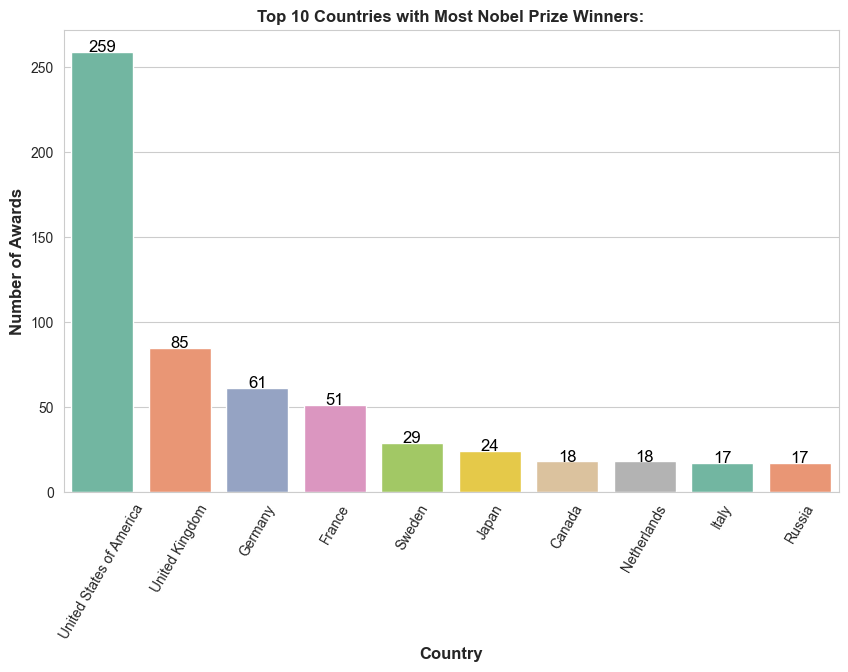

In [23]:
top_countries = df['birth_country'].value_counts().head(10)
countries = pd.DataFrame({'Country': top_countries.index, 'Count': top_countries.values})

countries.columns = ['Country', 'Number of Awards']
table_title = "Top 10 Countries with Most Nobel Prize Winners:"

ax = sns.barplot(x="Country", y="Number of Awards", data=countries,palette="Set2")
ax.set_title(table_title, fontweight='bold', fontsize=12)
ax.set_xlabel("Country", fontweight='bold', fontsize=12)
ax.set_ylabel("Number of Awards", fontweight='bold', fontsize=12)
plt.xticks(rotation=60)

for index, row in countries.iterrows():
    ax.text(index, row['Number of Awards'] + 0.2, str(row['Number of Awards']), color='black', ha="center", fontsize=12)

plt.show()

In this study, the countries that won the most Nobel Prizes between 1901 and 2016 have been calculated. Due to the high number of missing values in the **organization_country**  column of our dataset, the countries were determined based on the **birth countries**  of the laureates. This approach has been maintained throughout the subsequent analyses.
​
Looking at the chart, it's clear that the United States won the most Nobel Prizes between 1901 and 2016 by a wide margin. The U.S. is followed by the United Kingdom, Germany, and France, respectively. The reasons behind the U.S.'s dominance in the number of prizes will be examined in more detail in the following sections.
​
​
​

<p style="background-color:#ffff7e; font-family:'Arial', sans-serif; color:#003366; font-size:2em; text-align:center; border-radius:15px; padding:20px; margin:20px 0;">
    2. First Female Nobel Prize Winners
</p>


In [27]:
total_winners = df['full_name'].nunique()
print("total_winners:", total_winners)

total_winners: 904


In [29]:
total_female_winners = df[df['sex'] == 'Female']['full_name'].nunique()
print("Total number of female who won awards:", total_female_winners)

Total number of female who won awards: 48


In [31]:
female_winners= df[df['sex'] == 'Female'].sort_values(by='year')
female_winner_data=female_winners.head(10)[['year','full_name','category', 'birth_country']]
first_female_winners= female_winner_data.drop_duplicates(subset='full_name', keep='first')
first_female_winners

,year,full_name,category,birth_country
19,1903,"Marie Curie, née Sklodowska",Physics,Russian Empire (Poland)
29,1905,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace,Austrian Empire (Czech Republic)
51,1909,Selma Ottilia Lovisa Lagerlöf,Literature,Sweden
128,1926,Grazia Deledda,Literature,Italy
141,1928,Sigrid Undset,Literature,Denmark
160,1931,Jane Addams,Peace,United States of America
179,1935,Irène Joliot-Curie,Chemistry,France
198,1938,Pearl Buck,Literature,United States of America
218,1945,Gabriela Mistral,Literature,Chile


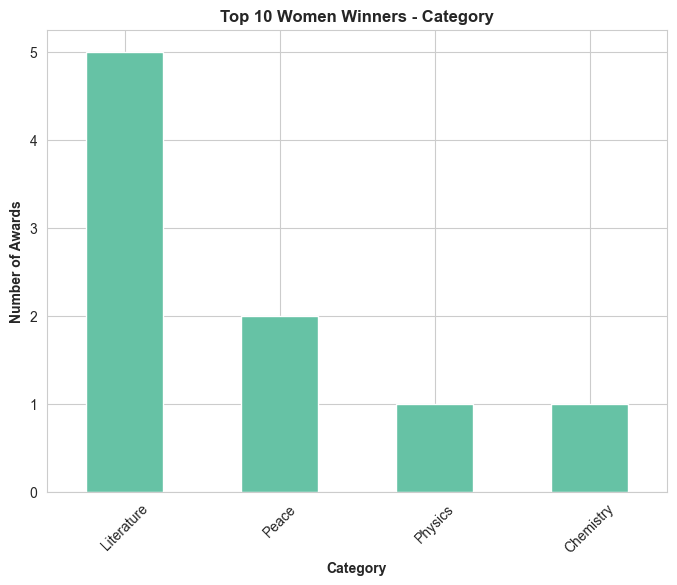

In [33]:
plt.figure(figsize=(8, 6))
first_female_winners['category'].value_counts().plot(kind='bar')
plt.title("Top 10 Women Winners - Category", fontweight='bold')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Number of Awards', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

According to the data, between 1901 and 2016, a total of 904 individuals received Nobel Prizes, and 48 of those recipients were women. The first woman to win a Nobel Prize was Marie Curie in 1903, in the Physics category. She was followed by Baroness Bertha Sophie Felicita von Suttner, who won in the Peace category in 1905, and Selma Ottilia Lovisa Lagerlöf, who won in the Literature category in 1909.

The data shows that women typically did not win Nobel Prizes in consecutive years. This trend may be linked to the socio-cultural challenges women faced, particularly during wartime periods. When we examine the graph, it is evident that the early female laureates were more concentrated in the Literature category.

<p style="background-color:#ffff7e; font-family:'Arial', sans-serif; color:#003366; font-size:2em; text-align:center; border-radius:15px; padding:20px; margin:20px 0;">
    3. First Male Nobel Prize Winners
</p>

In [37]:
male_winners = df[df['sex'] == 'Male']
total_male_winners = male_winners.shape[0]
;
print("Total number of male who won awards", total_male_winners)

Total number of male who won awards 836


In [39]:
male_winners.sort_values(by='year')
male_winner_data= male_winners.head(10)[['year','full_name', 'category', 'birth_country']]
first_male_winners= male_winner_data.drop_duplicates(subset='full_name', keep='first')
first_male_winners

,year,full_name,category,birth_country
0,1901,Jacobus Henricus van 't Hoff,Chemistry,Netherlands
1,1901,Sully Prudhomme,Literature,France
2,1901,Emil Adolf von Behring,Medicine,Prussia (Poland)
3,1901,Jean Henry Dunant,Peace,Switzerland
4,1901,Frédéric Passy,Peace,France
5,1901,Wilhelm Conrad Röntgen,Physics,Prussia (Germany)
6,1902,Hermann Emil Fischer,Chemistry,Prussia (Germany)
7,1902,Christian Matthias Theodor Mommsen,Literature,Schleswig (Germany)
8,1902,Ronald Ross,Medicine,India
9,1902,Élie Ducommun,Peace,Switzerland


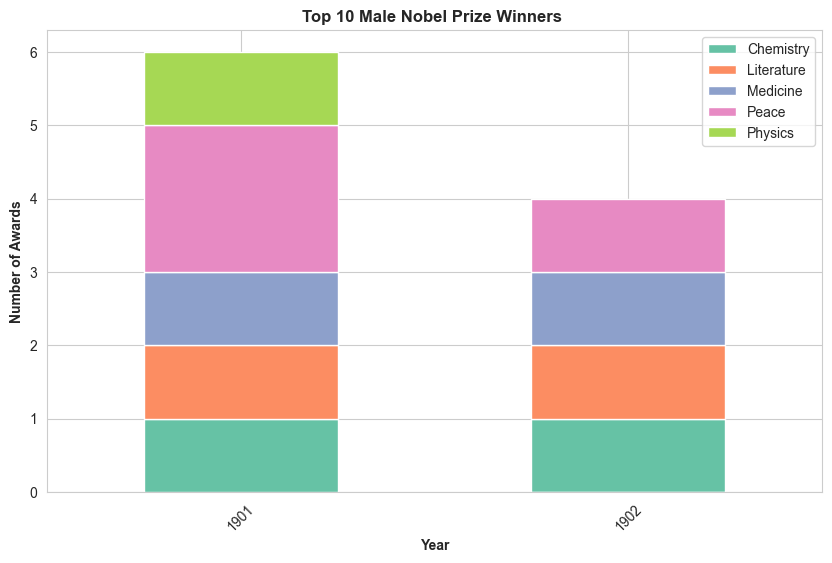

In [41]:
category_counts_male = first_male_winners.groupby('year')['category'].apply(lambda x: x.value_counts()).unstack()
top_total_counts = category_counts_male.sum(axis=1)

category_counts_male.plot(kind='bar', stacked=True)
plt.title("Top 10 Male Nobel Prize Winners ", fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Awards', fontweight='bold')
plt.xticks(rotation=45)


max_value = category_counts_male.max().max()
plt.yticks(range(0, int(max_value) + 5)) 

plt.show();

When examining the first male Nobel Prize winners between 1901 and 2016, it is seen that in the initial years of 1901 and 1902, all awards were given to male candidates. In 1901, the first year the Nobel Prizes were awarded, two laureates from Switzerland and France received prizes in the Peace category. This suggests that in the early years, male candidates were more frequently awarded in the Peace category.

<p style="background-color:#ffff7e; font-family:'Arial', sans-serif; color:#003366; font-size:2em; text-align:center; border-radius:15px; padding:20px; margin:20px 0;">
    4. US Dominance 
</p>

In [45]:
country_counts = df['birth_country'].value_counts()
total_awards = country_counts.sum()

print(f"Total Awards: {total_awards}")

Total Awards: 885


In [47]:
top_country = country_counts.idxmax()
top_country_count= country_counts. max()
print("The country with the most Nobel Prizes:", top_country, "-", top_country_count, "Awards" )

The country with the most Nobel Prizes: United States of America - 259 Awards


In [49]:
top_countries = df['birth_country'].value_counts().nlargest(3).index

country_decade_percentages = []
for country in top_countries:
    country_data = df[df['birth_country'] == country]
    country_decade_data = (np.floor(country_data['year'] / 10) * 10).astype(int)
    country_decade_counts = country_data.groupby(country_decade_data)['birth_country'].count()
    country_decade_percentage = country_decade_counts / country_decade_counts.sum() * 100
    country_decade_percentages.append(country_decade_percentage)


country_decade_percentages_df = pd.concat(country_decade_percentages, axis=1)
country_decade_percentages_df.columns = top_countries

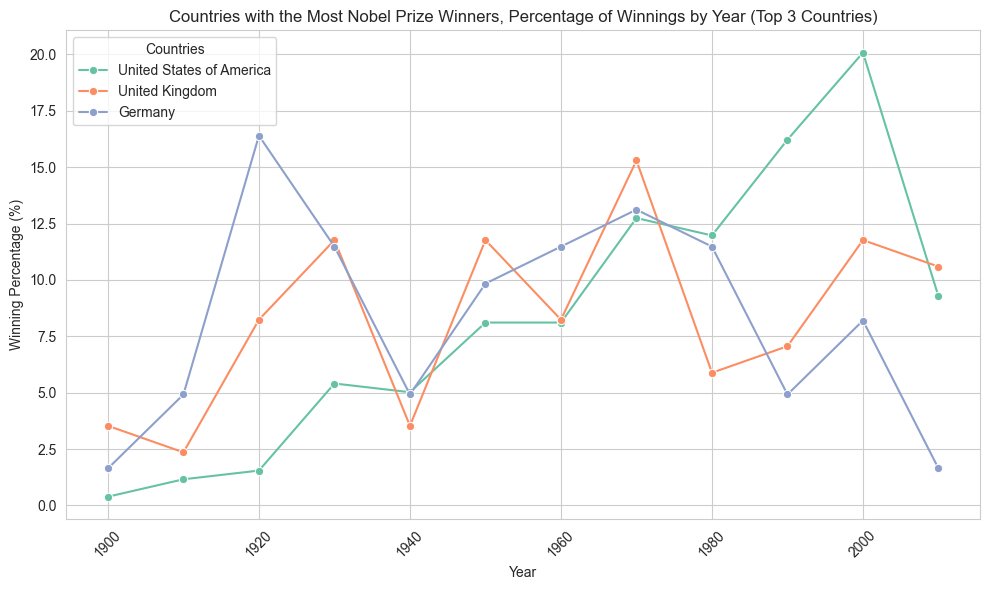

In [51]:
sns.lineplot(data=country_decade_percentages_df, dashes=False, marker='o')
plt.title('Countries with the Most Nobel Prize Winners, Percentage of Winnings by Year (Top 3 Countries)')
plt.xlabel('Year')
plt.ylabel('Winning Percentage (%)')
plt.legend(title='Countries')
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.tight_layout()
plt.show()

In this study, a detailed analysis of the United States' Nobel Prize-winning process has been conducted, comparing it with the two countries that won the most awards to examine the dominance of the U.S. in Nobel Prizes. The results indicate that from the 1920s onwards, the U.S. has seen a steady increase in its prize-winning rate. In a historical context, the rise in scientific activities in the U.S. during World War II significantly contributed to its prominence in Nobel Prizes. Between 1980 and 2000, the rate of award-winning reached up to 20%. During this period, increased investments in science and technology in the U.S., advancements in research and innovation, and intensified international scientific collaborations and interactions contributed to greater success in Nobel Prizes. Although the rate of award-winning candidates in the U.S. began to decline after 2000, the U.S. remained the country with the highest prize-winning rate until around 2016. Meanwhile, the United Kingdom, which saw a resurgence in the 1980s, did not surpass the U.S. in prize-winning rates until 2015-2016.

<p style="background-color:#ffff7e; font-family:'Arial', sans-serif; color:#003366; font-size:2em; text-align:center; border-radius:15px; padding:20px; margin:20px 0;">
     5. Nobel Prize Winners Analysis
</p>

In [55]:
 df['age'].mean()

57.62568605927552

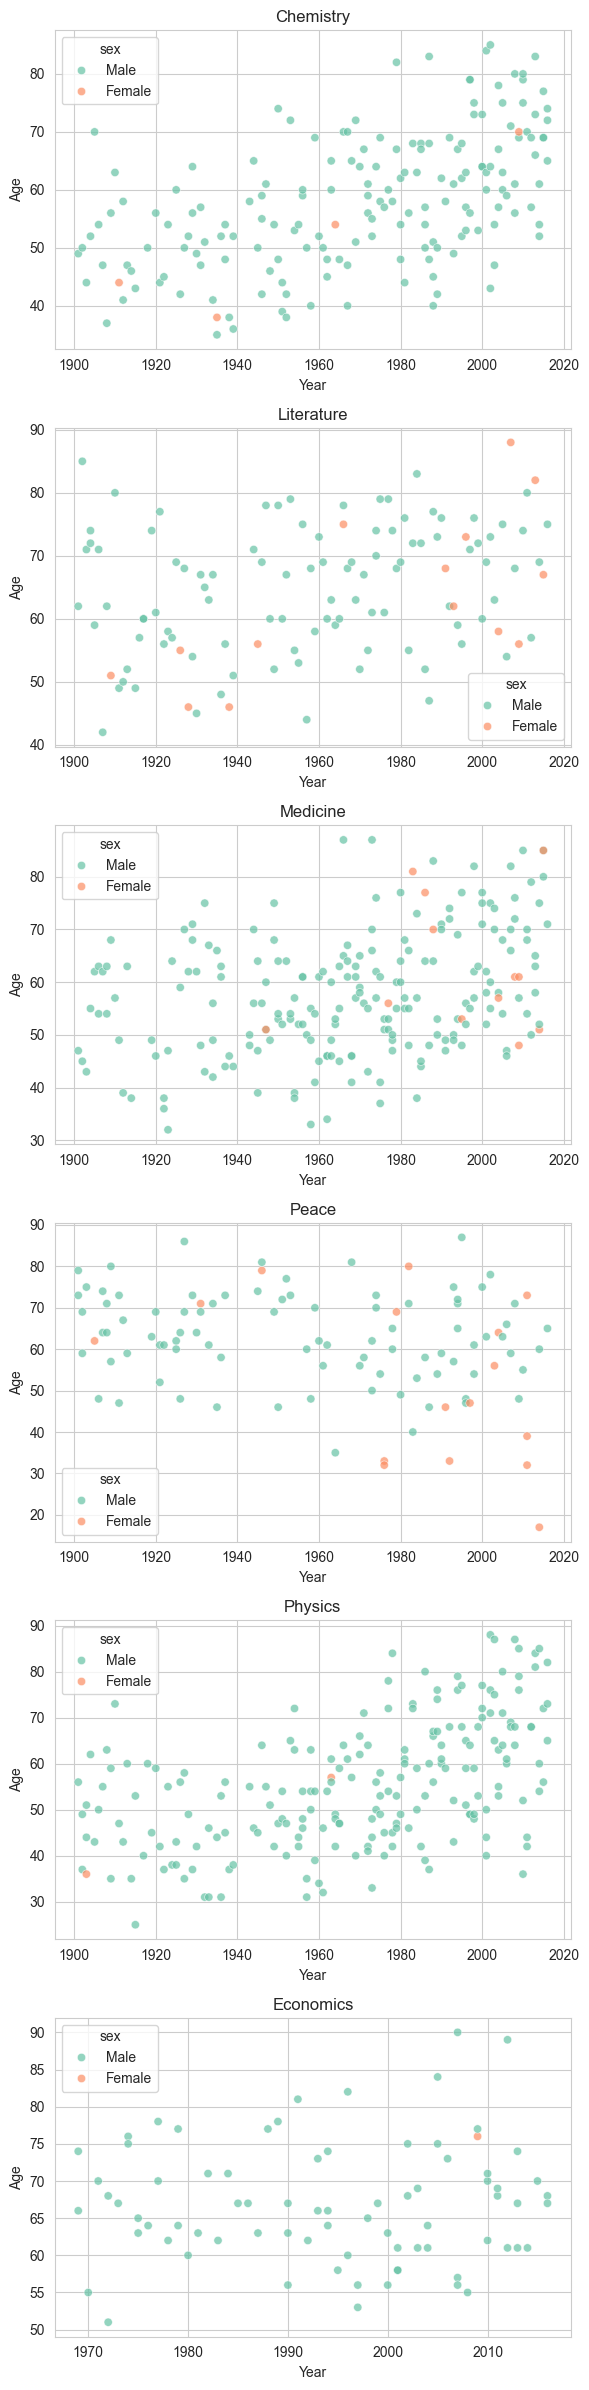

In [57]:
df_filtered = df[df['age'] != 0]

categories = df_filtered['category'].unique()

fig, axes = plt.subplots(len(categories), figsize=(6, 4*len(categories)))

for i, category in enumerate(categories):
    ax = axes[i]
    sns.scatterplot(
        data=df_filtered[df_filtered['category'] == category],
        x='year', y='age', hue='sex',
        ax=ax,
        alpha=0.7
    )
    ax.set_title(f'{category}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Age')

plt.tight_layout()
plt.show()

When examining the demographic distribution of Nobel Prize winners between 1901 and 2016, it is observed that the average age of award recipients is around 60. Generally, in many categories, the maximum age of winners exceeds 80. Notably, fields such as Chemistry, Literature, and Medicine show that the age of award recipients reaches these higher levels. Conversely, the minimum age for receiving awards typically ranges between 30 and 40, although in the Peace category, this lower age limit drops to 20, and in the Economics category, it rises to 50. Additionally, it has been found that women have received the fewest awards in the disciplines of Physics and Economics.

<p style="background-color:#ffff7e; font-family:'Arial', sans-serif; color:#003366; font-size:2em; text-align:center; border-radius:15px; padding:20px; margin:20px 0;">
     6. Nobel Prize Winners 1938-1945
</p> 

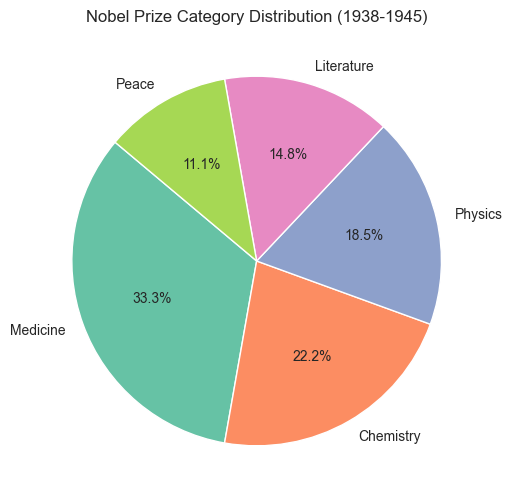

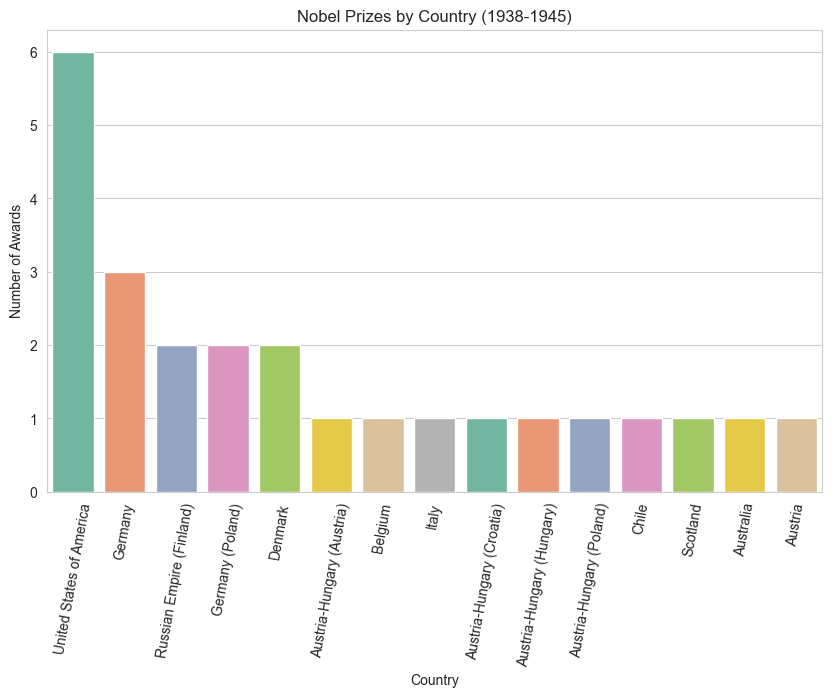

In [61]:
filtered_df = df[(df['year'] >= 1938) & (df['year'] <= 1945)]


category_counts = filtered_df['category'].value_counts()
country_counts_country = filtered_df['birth_country'].value_counts()  

plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Nobel Prize Category Distribution (1938-1945)')
plt.show()

sns.barplot(x=country_counts_country.index, y=country_counts_country.values, palette="Set2")
plt.title('Nobel Prizes by Country (1938-1945)')
plt.xlabel('Country')
plt.ylabel('Number of Awards')
plt.xticks(rotation=80)
plt.show()

The distribution of Nobel Prizes by country and category for the years 1938 to 1945 has been illustrated. During this period, 33% of the awards were conferred in the field of Medicine, while the Peace category received the fewest, accounting for 11%. The United States, with a total of 6 awards, was the leading country in terms of the number of prizes won. It was followed by Germany, which received 3 awards, and Russia, Poland, and Denmark, each of which secured 2 awards.

<p style="background-color:#ffff7e; font-family:'Arial', sans-serif; color:#003366; font-size:2em; text-align:center; border-radius:15px; padding:20px; margin:20px 0;">
     7.Nobel Prize Winners 1947-1991
</p>

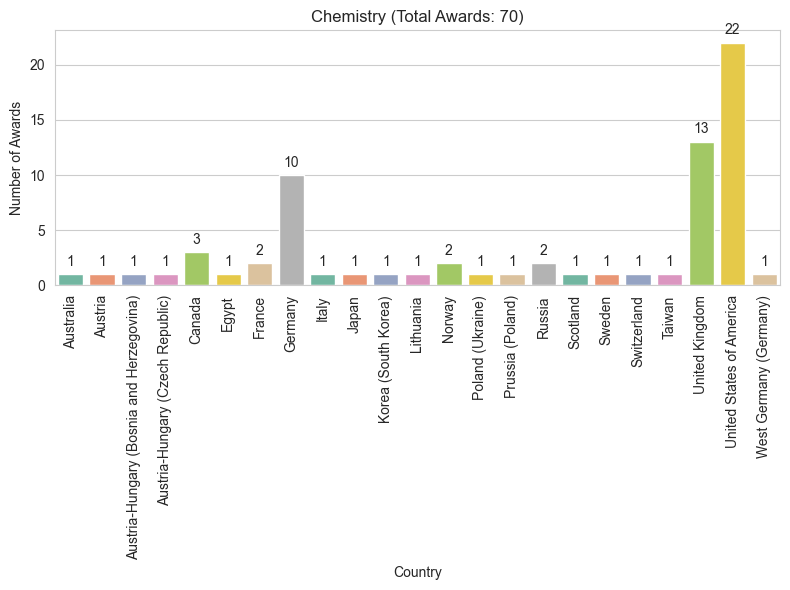

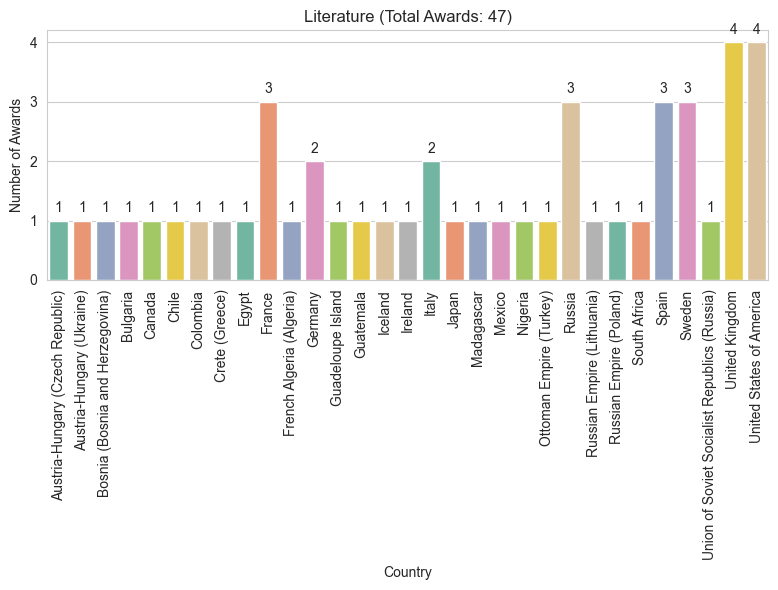

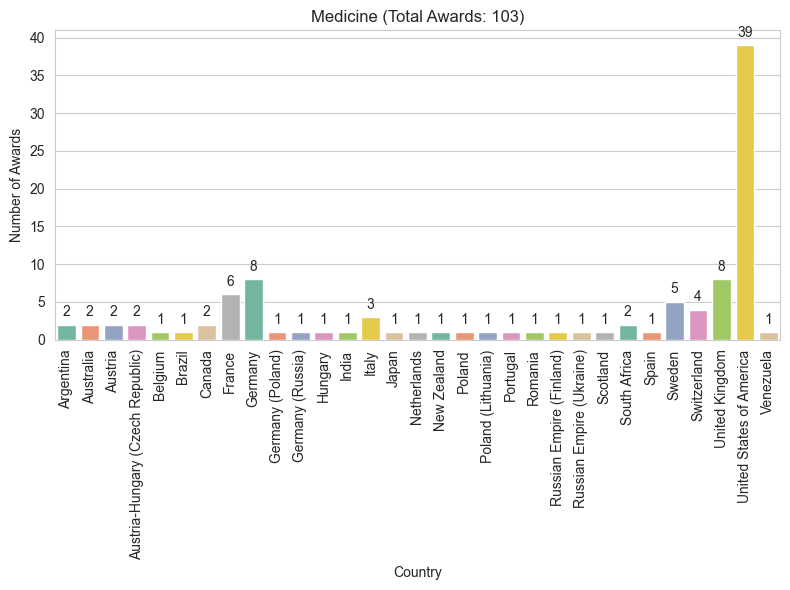

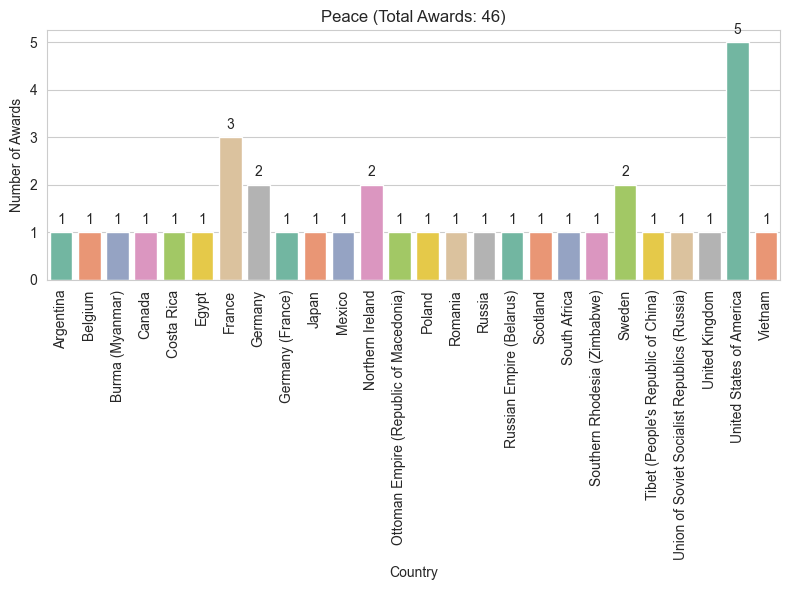

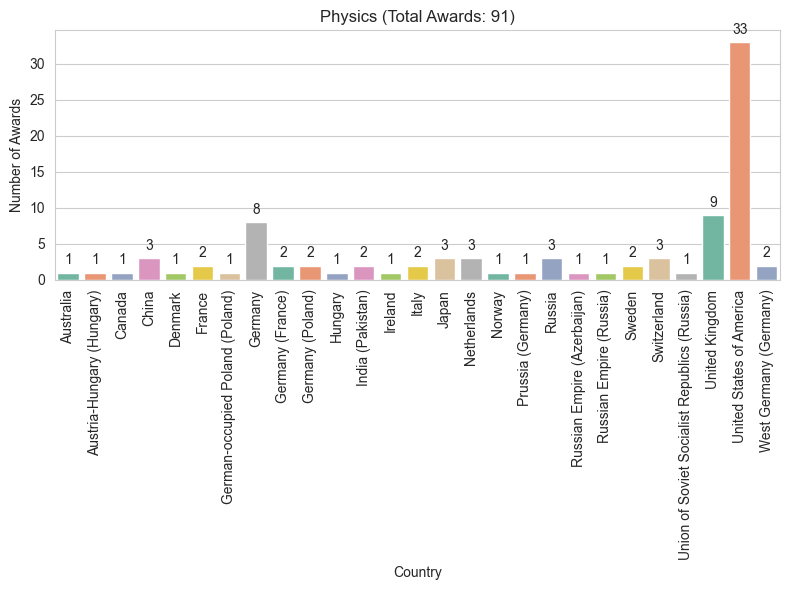

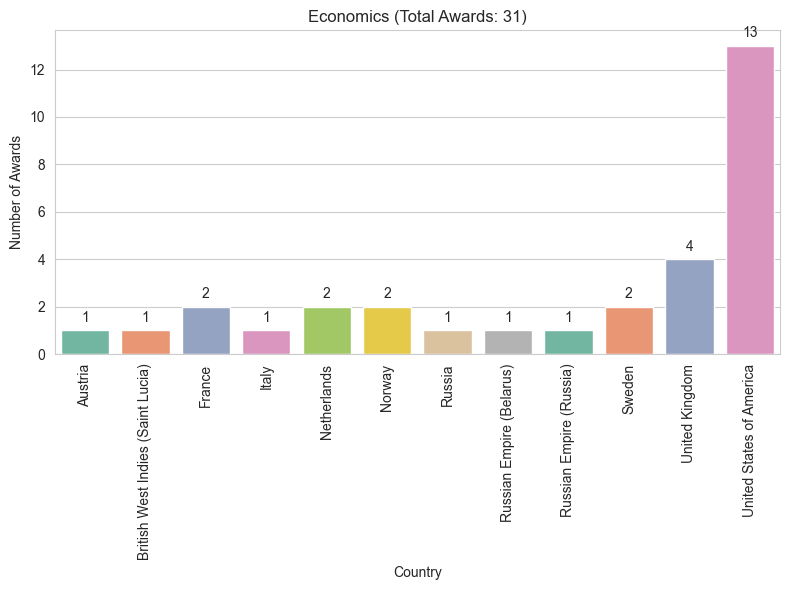

In [65]:
df_1947_1991= df[(df['year'] >= 1947) & (df['year'] <= 1991)]
categories_group = df_1947_1991['category'].unique()

for category in categories_group:
    category_data = df_1947_1991[df_1947_1991['category'] == category]
    grouped_data = category_data.groupby(['birth_country']).size().reset_index(name='count')
    
    plt.figure(figsize=(8, 6))
    barplot=sns.barplot(x='birth_country', y='count', data=grouped_data, palette="Set2")
    plt.xlabel('Country')
    plt.ylabel('Number of Awards')
    barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
    
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 9), 
                         textcoords = 'offset points')
    total_awards = category_data.shape[0]
    plt.title(f'{category} (Total Awards: {total_awards})')
    
    plt.tight_layout()
    plt.show()

The charts examine the distribution of Nobel Prizes by country and category for the period from 1947 to 1991. During this time, the highest number of awards were given in the field of Medicine, with a total of 103 prizes. In the Medicine category, 31 countries received awards, with 39 of these going to U.S. candidates. The fewest awards were given in the Economics category, which is attributable to the fact that the Economics Prize was first introduced in 1969.

Except for the Literature category, U.S. candidates won the most awards in all other fields, including Science, Peace, and various other categories. In the Literature category, both the United Kingdom and the United States received an equal number of awards. Overall, the United Kingdom followed the United States in terms of success during this period, with the U.K. being the second-highest award-winning country, excluding the Peace category.

<p style="background-color:#ffff7e; font-family:'Arial', sans-serif; color:#003366; font-size:2em; text-align:center; border-radius:15px; padding:20px; margin:20px 0;">
      8.Post-2000 Chemistry, Literature, Peace, Physics and Medicine Categories
</p> 

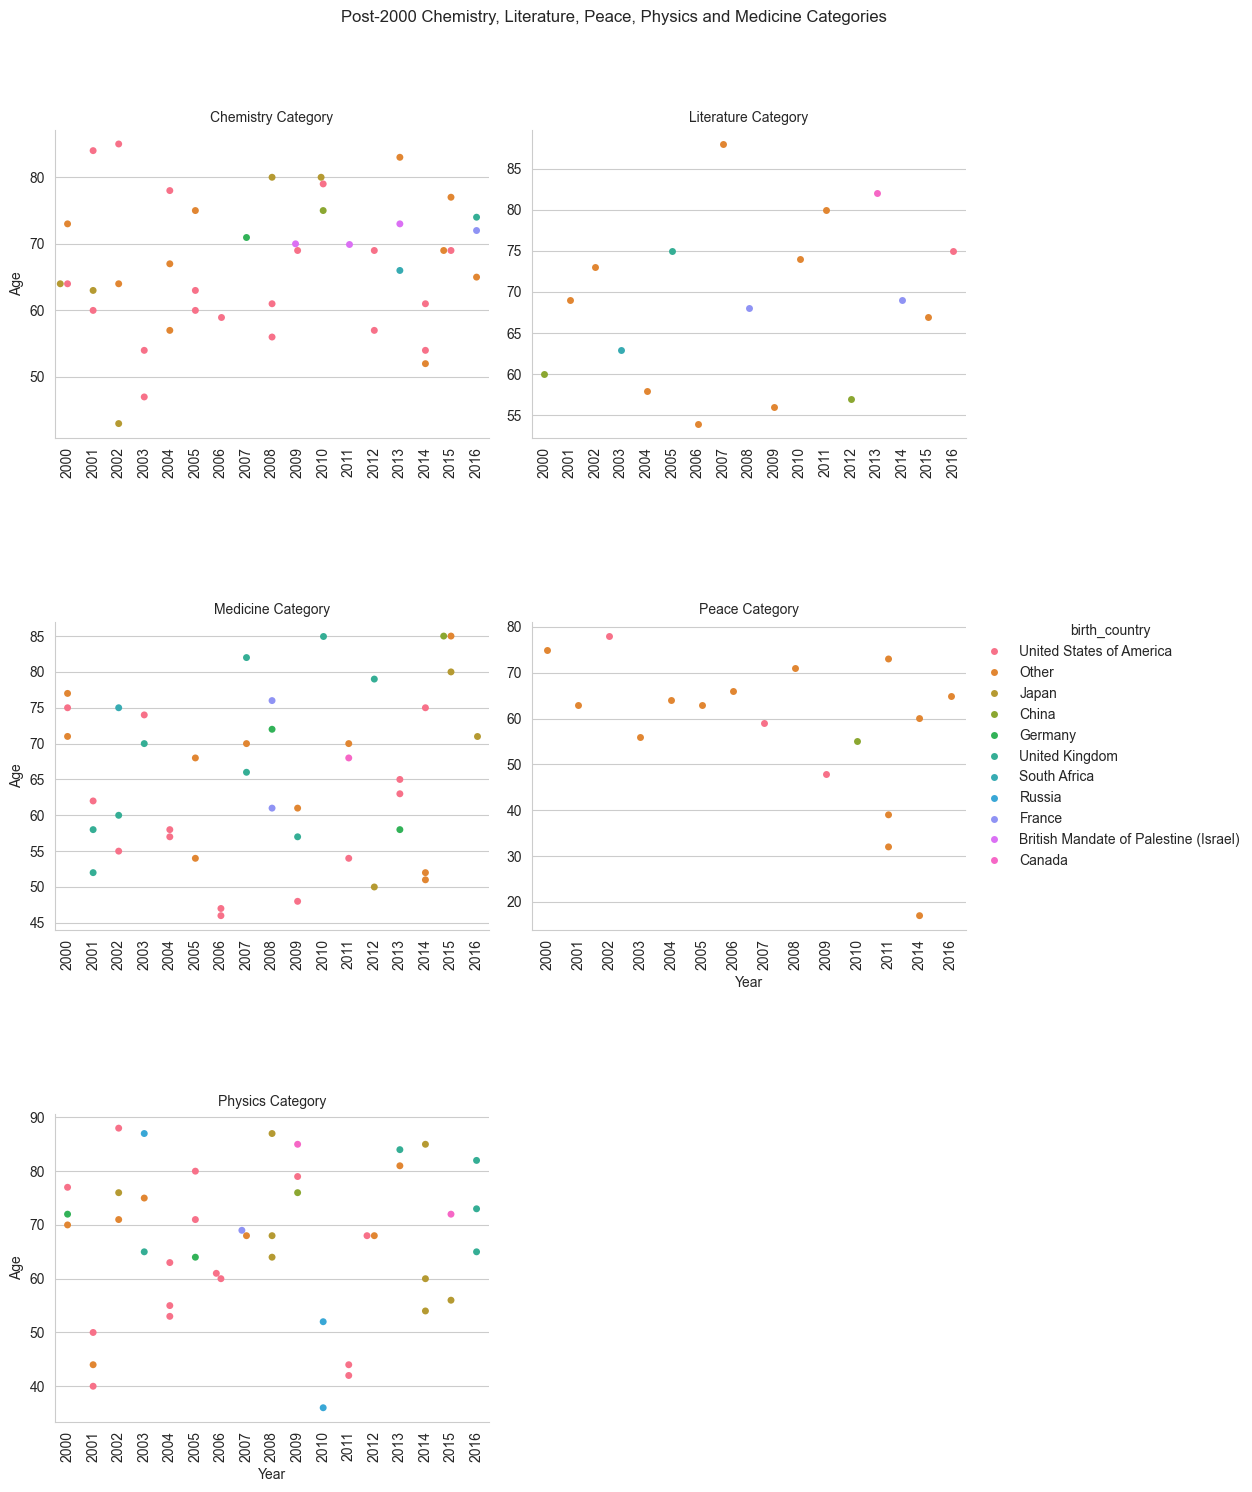

In [68]:
categories_filtered = ['Chemistry', 'Literature', 'Peace', 'Physics', 'Medicine']
result_df = df[(df['year'] >= 2000) & (df['category'].isin(categories_filtered)) & (df['age'] != 0)]
top_countries = result_df['birth_country'].value_counts().nlargest(10).index
result_df.loc[~result_df['birth_country'].isin(top_countries), 'birth_country'] = 'Other'
result_df['year'] = result_df['year'].astype(str).str[:4]

g = sns.catplot(
    data=result_df,
    x="year",
    y="age",
    hue="birth_country",
    col="category",
    kind="swarm",
    col_wrap=2,
    sharex=False,
    sharey=False
)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Year", "Age")
g.set_titles(col_template="{col_name} Category")
plt.subplots_adjust(top=0.9, hspace=0.6)
g.fig.suptitle('Post-2000 Chemistry, Literature, Peace, Physics and Medicine Categories')


plt.show()

Between 2000 and 2016, the distribution of age and country of Nobel Prize winners in the categories of Chemistry, Literature, Peace, Physics, and Medicine was analyzed. For clearer results, the top 10 countries with the most awards were identified, and other countries were grouped under the "Other" category. This analysis reveals that the Peace category has the lowest average age for award recipients. The award received by Malala Yousafzai at the age of 17 represents a rare example in the history of the Nobel Prizes in terms of age. Generally, the average age of award recipients falls within the 40-70 range. While many categories feature recipients who are around 80 years old, some awards have been given to individuals aged 85-90.

Between 2000 and 2016, it was observed that the Literature and Peace categories were those in which the United States received the fewest awards. Notably, the United States did not win any Nobel Prize in Literature from 2000 to 2016.